In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
datos=load_breast_cancer()

In [7]:
X=datos.data

In [8]:
y=datos.target

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [10]:
X=minmax.fit_transform(X)

In [11]:
from sklearn.model_selection import StratifiedKFold
K=10
skf=StratifiedKFold(n_splits=K)

In [ ]:
#FFKLL FLAAR
#encontrar mejor kmeans. para kmeans aciertos en train y test

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import time
resultados=pd.DataFrame(columns=["kmeans","aciertos entrena","aciertos test"])

In [57]:
inicial=time.time()
for i,k in enumerate(range(2,6)):
    
    aciertos_entrena=0
    aciertos_test=0
    for train_index,test_index in skf.split(X,y):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(X[train_index],y[train_index])
        labels=kmeans.labels_
        array=np.zeros(k)
        y_train=y[train_index]
        for a in range(k):
            similares=(labels==a)
            argwhere=np.argwhere(similares)
            train_encontrados=y_train[argwhere]
            array[a]=mode(train_encontrados)[0]
        aciertos_entrena+=accuracy_score(y[train_index],array[kmeans.predict(X[train_index])])
        aciertos_test+=accuracy_score(y[test_index],array[kmeans.predict(X[test_index])])
    resultados.loc[len(resultados)]=[k,aciertos_entrena/K,aciertos_test/K]
            
empleado=time.time()-inicial
print("Tiempo:",empleado)

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_22120\1302293950.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  array[a]=mode(train_encontrados)[0]
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Tiempo: 1.8923728466033936


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_22120\1302293950.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  array[a]=mode(train_encontrados)[0]
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_22120\1302293950.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis i

In [58]:
resultados

,kmeans,aciertos entrena,aciertos test
0,2.0,0.927554,0.926222
1,3.0,0.901191,0.905138
2,4.0,0.894352,0.877068
3,5.0,0.920914,0.919173


In [36]:
mayor=resultados["aciertos test"].max()
print(mayor)
optimo=resultados["aciertos test"].idxmax()
print(optimo)


0.8507518796992481
3


In [43]:
import matplotlib.pyplot as plt

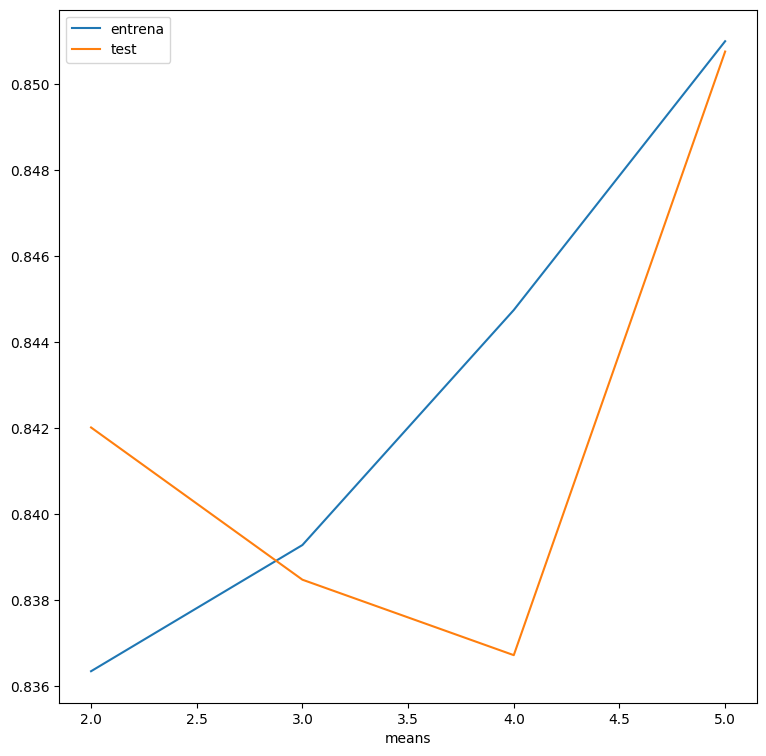

In [48]:
plt.figure(figsize=(9,9))
plt.plot(resultados["kmeans"],resultados["aciertos entrena"],label="entrena")
plt.plot(resultados["kmeans"],resultados["aciertos test"],label="test")
plt.xlabel("means")
plt.legend()
plt.show()

In [37]:
#KCESE
kmeans=KMeans(n_clusters=optimo)
kmeans.fit(X,y)

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

In [39]:
centros=kmeans.cluster_centers_

In [40]:
distancias=euclidean_distances(centros)

In [41]:
sigma=np.sum(distancias,axis=0)/centros.shape[0]-1

In [42]:
X_svm=np.exp(-cdist(X,centros)**2/(2*(sigma**2)))
X_svm

array([[3.48855846e-10, 3.47386896e-03, 1.93134491e-02],
       [1.77005820e-03, 1.97243042e-01, 5.86698999e-02],
       [2.62007486e-05, 6.19863646e-01, 1.80361554e-01],
       ...,
       [2.99854545e-02, 7.34062634e-02, 1.71051397e-01],
       [4.28062424e-12, 2.59489903e-03, 9.45958615e-03],
       [3.01773543e-02, 2.17497380e-07, 2.36289413e-03]])

In [ ]:
#FF SAAA
#mejor grado para la svm

In [49]:
from sklearn.svm import SVC

In [50]:
resultados_SVM=pd.DataFrame(columns=["grado","aciertos"])

In [54]:
for i,g in enumerate(range(2,5)):
    aciertos=[]
    for train_index,test_index in skf.split(X,y):
        svm=SVC(degree=g,kernel="poly")
        svm.fit(X[train_index],y[train_index])
        aciertos.append(svm.score(X[test_index],y[test_index]))
    media=np.array(aciertos)
    resultados_SVM.loc[i]=[g,media.mean()]



In [55]:
resultados_SVM

,grado,aciertos
0,2.0,0.980639
1,3.0,0.971867
2,4.0,0.968358
